# Brain Observatory: *What are those cells doing?*

### This sandbox will help you analyze a dataset from the Allen Institute's Brain Observatory.

These datasets contain calcium imaging data for various different cell types in the visual cortex of the mouse. It's likely that these cell types have different roles in the visual system -- your mission is to figure out what these roles are. You will choose a visual area, a cell type, and look at their responses to natural stimuli.

### By the end of this lesson, you will be able to:
1. Examine a 2-photon imaging dataset for a particular cell type, in a specific visual area.
2. Use imshow to visualize two-dimensional images in Python.
3. Create plots of raw calcium imaging data.

Additional information on this dataset, and how it was collected, can be found <a href="http://help.brain-map.org/display/observatory/Data+-+Visual+Coding">here</a> as well as in the <a href="http://alleninstitute.github.io/AllenSDK/brain_observatory.html">SDK documentation</a>. 

## Step 1. Importing toolboxes
First, we'll import the necessary toolboxes to run this code. The first chunk of "import" lines will bring in some standard toolboxes that we need. For example, "numpy" is a toolbox that has functions to work with large arrays. The second chunk of import lines brings in some toolboxes that the Allen Brain Observatory has already packaged, to help users analyze its data.

<div class="alert alert-success"><b>Task</b>: In addition to the modules already imported below, import <code>numpy</code>, <code>pandas</code>, and <code>matplotlib.pyplot</code> as their conventional names.</div>

In [1]:
# Install allensdk if it isn't already there
try:
    import allensdk
    print("allensdk is already installed.")
except ImportError:
    print("allensdk not found, installing now...")
    !pip install allensdk

allensdk is already installed.


In [2]:
# Allen specific toolboxes
import allensdk.brain_observatory.stimulus_info as stim_info
from allensdk.core.brain_observatory_cache import BrainObservatoryCache

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/opt/miniconda3/envs/jb_py311/lib/python3.11/site-packages/allensdk/core/brain_observatory_nwb_data_set.py:43: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import parse_version


Similar to how we created an instance of the CellTypesCache, here we'll create an instance of the "BrainObservatoryCache." The datahub already has a manifest file available in the directory you see below. This directory also has all of the data we need.

<font color='red'>**Note**: You need to run this notebook in the Docker container that includes allen-brain-observatory (often denoted by 'w/ allen'). Otherwise you will get a permissions error when you attempt to run the cell below.</font>

In [3]:
# We will create an instance of the Brain Observatory Cache as an object, "boc."
boc = BrainObservatoryCache(manifest_file='manifest.json')

## Step 2. Get a list of all possible transgenic mouse lines and brain areas, and choose which to work with.
Next, we'll ask that "boc" structure to tell us what all of the possible Cre lines and brain areas are that we can analyze. You'll need to use these exact names when you're trying to pull a specific one from the dataset.


In [4]:
# We'll save the list of cre lines as a variable, 'cre-lines'.
cre_lines = boc.get_all_cre_lines()
print("all cre lines: " + str(cre_lines))

# We'll save the list of possible structures as a variable, 'brain_areas'.
brain_areas = boc.get_all_targeted_structures()
print("all brain regions: " + str(brain_areas))

all cre lines: ['Cux2-CreERT2', 'Emx1-IRES-Cre', 'Fezf2-CreER', 'Nr5a1-Cre', 'Ntsr1-Cre_GN220', 'Pvalb-IRES-Cre', 'Rbp4-Cre_KL100', 'Rorb-IRES2-Cre', 'Scnn1a-Tg3-Cre', 'Slc17a7-IRES2-Cre', 'Sst-IRES-Cre', 'Tlx3-Cre_PL56', 'Vip-IRES-Cre']
all brain regions: ['VISal', 'VISam', 'VISl', 'VISp', 'VISpm', 'VISrl']


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p><b>Task:</b>  Choose a visual area and Cre line from the lists above to examine in the rest of the notebook. Refer back to our lecture slides or the <a href="http://observatory.brain-map.org/visualcoding">Brain Observatory landing page</a> to learn more about these different visual areas. Primary cortex (VISp) is surrounded by several other brain regions, which have unknown functions.
    
You can find more info about the Cre-lines here <a href="http://observatory.brain-map.org/visualcoding/transgenic">here</a>.

1. Create a new block of **Markdown** text below this one which briefly describes your visual area and Cre line. Remember that markdown is the other type of block that Jupyter supports. You can change your block to Markdown using the dropdown in the menu above. Check out <a href="https://www.markdownguide.org/cheat-sheet/">this cheatsheet</a> for a few handy elements of Markdown syntax.
2. Assign your visual area and cre line to <code>visual_area</code> and <code>cre_line</code>, respectively.
</div>

In [5]:
visual_area = 'VISp'
cre_line = 'Rorb-IRES2-Cre'

## Step 3. Extract an experiment session.

<div class="alert alert-success"><b>Task</b>: Create a dataframe of experiments.</div>

1. Use the `get_experiment_containers()` method of our `boc` object to get a list of experiments that are available. This method takes the arguments `targeted_structures= ` as well as `cre_lines= `, which both require a list. Assign the outcome of this method to `experiments`.
2. Create a dataframe out of `exps` and assign it to `exps_df`.
3. There isn't an experiment for every combination of Cre lines and visual areas above. Add an `if` statement that will print a statement for you if the dataframe you created is empty (Hint: use `empty` attribute).
4. Show the head of your dataframe.

In [6]:
exps = boc.get_experiment_containers(targeted_structures=[visual_area],cre_lines =[cre_line])
exps_df = pd.DataFrame(exps)
exps_df.head()

,id,imaging_depth,targeted_structure,cre_line,reporter_line,donor_name,specimen_name,tags,failed
0,511510675,275,VISp,Rorb-IRES2-Cre,Ai93(TITL-GCaMP6f),228786,Rorb-IRES2-Cre;Camk2a-tTA;Ai93-228786,[],False
1,586351979,275,VISp,Rorb-IRES2-Cre,Ai93(TITL-GCaMP6f),304756,Rorb-IRES2-Cre;Camk2a-tTA;Ai93-304756,[],False
2,590168381,275,VISp,Rorb-IRES2-Cre,Ai93(TITL-GCaMP6f),305467,Rorb-IRES2-Cre;Camk2a-tTA;Ai93-305467,[],False
3,511510989,275,VISp,Rorb-IRES2-Cre,Ai93(TITL-GCaMP6f),222431,Rorb-IRES2-Cre;Camk2a-tTA;Ai93-222431,[],False
4,512124562,275,VISp,Rorb-IRES2-Cre,Ai93(TITL-GCaMP6f),234831,Rorb-IRES2-Cre;Camk2a-tTA;Ai93-234831,[],False


Once you've successfully found a combination that works, you should have the head of your dataframe above. Let's look into one of these experiment containers, most of which have three different sessions for different types of visual stimuli.


<div class="alert alert-success"><b>Task:</b>

1. Pick an experiment from the table above. Copy the id in the "id" column and assign it to <code>experiment_container_id</code>.
2. Use the <code>get_ophys_experiments()</code> method on our <code>boc</code> object, providing it with the arguments <code>experiment_container_ids= </code> and <code>stimuli=['natural_scenes']</code>. This will restrict our search to experiments with our ID and where natural stimuli were shown. Assign this to <code>expt_cont</code>.
3. Look at the <code>expt_cont</code> object. What kind of object is this?
    
</div>

In [7]:
experiment_container_id = 512124562

expt_cont = boc.get_ophys_experiments(experiment_container_ids=[experiment_container_id],stimuli=['natural_scenes'])
type(expt_cont)
expt_cont

[{'id': 512124564,
  'imaging_depth': 275,
  'targeted_structure': 'VISp',
  'cre_line': 'Rorb-IRES2-Cre',
  'reporter_line': 'Ai93(TITL-GCaMP6f)',
  'acquisition_age_days': 80,
  'experiment_container_id': 512124562,
  'session_type': 'three_session_B',
  'donor_name': '234831',
  'specimen_name': 'Rorb-IRES2-Cre;Camk2a-tTA;Ai93-234831',
  'fail_eye_tracking': False}]

Now, let's get the id for this experiment and extract the data using the `get_ophys_experiment_data` method. 
<div class="alert alert-success"><b>Task</b>:   
    
1. Programmatically, assign the 'id' of your <code>expt_cont</code> object to <code>session_id</code>.
2. Use the <code>get_ophys_experiment_data()</code> method, simply giving it your session_id as an argument, and assign the output of this to <code>data</code>.
3. What kind of object is data?

</div>

In [8]:
session_id = expt_cont[0]['id']
data = boc.get_ophys_experiment_data(session_id)
data

## Step 4. Download & inspect the natural scenes imaging session
First, we'll look at the session where the mouse viewed natural scenes.

Let's take a quick look at the data you just acquired. We'll take a maximum projection of the data, so that we can actually see the cells. If we just looked at one snapshot of the raw imaging data, the cells would look dim. A "maximum projection image" shows us the maximum brightness for each pixel, across the entire experiment.

Below, we are using the `get_max_projection()` method on our data, and then using the `imshow()` method in order to see our projection.

**Note**: The weird text for the ylabel is called "TeX" markup, in order to get the greek symbol *mu* ($\mu$). See documentation <a href="https://matplotlib.org/tutorials/text/mathtext.html">here</a>.

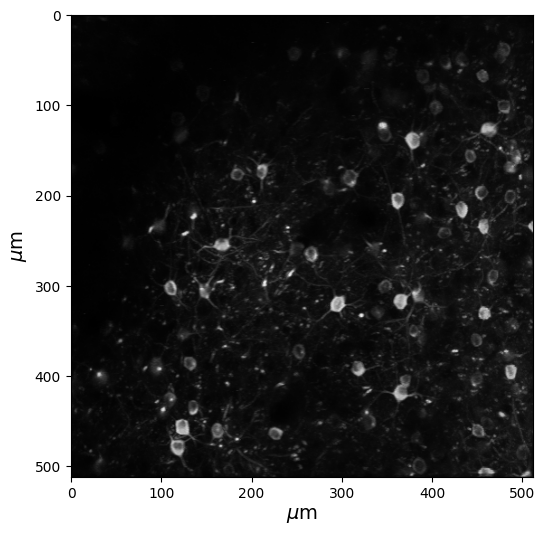

In [9]:
# Get the maximum projection (a numpy array) of our data
max_projection = data.get_max_projection()

# Create a new figure
fig = plt.figure(figsize=(6,6))

# Use imshow to visualize our numpy array
plt.imshow(max_projection, cmap='gray')

# Add labels for microns; weird syntax below is to get the micro sign
plt.ylabel(r'$\mu$m',fontsize=14)
plt.xlabel(r'$\mu$m',fontsize=14)
plt.show()

## Step 5. Look at the calcium transients of your cells

Now we'll plot the data of each of our cells (from the field of view above) across time. Each line shows the change in fluorescence over baseline ($\Delta$)F/F) of the individual cells. When there are sharp increases, that's when the cells are responding.

<div class="alert alert-success"><b>Task</b>:
    
1. Create a for loop that will plot, in succession, the responses of the <b>first ten cells</b> of your dataset, contained in dff. Use 'ts' (the timestamps of the data) for the x axis. 
2. Add informative labels to your plot. What is the x axis? What's the y axis?
3. Use <code>plt.xlim()</code> to zoom in on an interesting part of the data.
4. Inspect the data here -- how fast are these changes in fluorescence happening?
5. **Challenge**: How could you write this loop so that your traces wouldn't be overlapping?

</div>

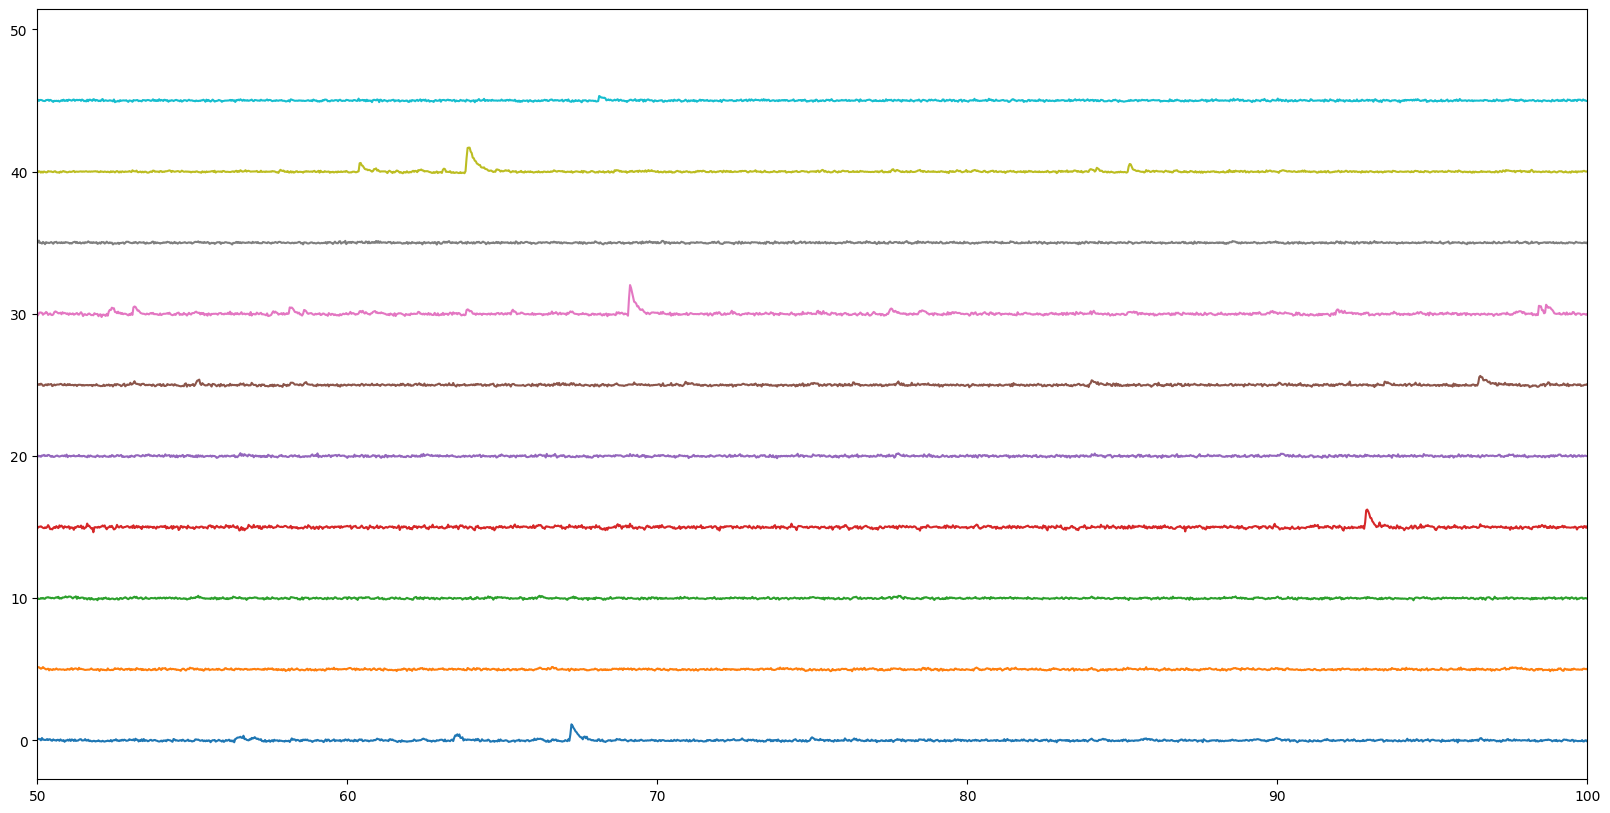

In [10]:
# Use the `get_dff_traces()` method to return both timestamps (ts, in seconds) as well as the deltaF/F (dff) 
ts, dff = data.get_dff_traces()

# Set up a figure
fig = plt.figure(figsize=(20,10))
offset = 0

# Your plotting script below
for neuron in range(10):
    plt.plot(ts,dff[neuron]+offset)
    plt.xlim([50,100])
    offset = offset + 5

plt.show()

## Step 6. Look at the response of your cells to natural scenes
Hmm, there are some responses above, but it's tough to see what's going on with just the raw traces. Let's instead see how these cells actually responded to different types of images. To do so, we'll need to use the `get_cell_specimens()` method on our `boc`, giving it the name of the experiment container ID to look for. The dataframe that this creates will have a lot more information about what the cells in our experiment prefer.

In [11]:
# Get the cell specimens information for this session
cell_specimens = boc.get_cell_specimens(experiment_container_ids=[experiment_container_id])
cell_specimens_df = pd.DataFrame(cell_specimens)
cell_specimens_df.head()

KeyboardInterrupt: 

Let's create a histogram of preferred images in our dataset. 
<div class="alert alert-success"><b>Task</b>:

1. Create a subset of this dataframe called 'sig_cells' where the column 'p_ns' is less than 0.05. In other words, we only want cells that *significantly* preferred a specific image.
2. The preferred image ID is in the 'pref_image_ns' column of this dataframe. Assign this to 'pref_images'.
3. Create a histogram of preferred images with 118 bins (there are 118 different images). There are multiple ways to do this!
</div>

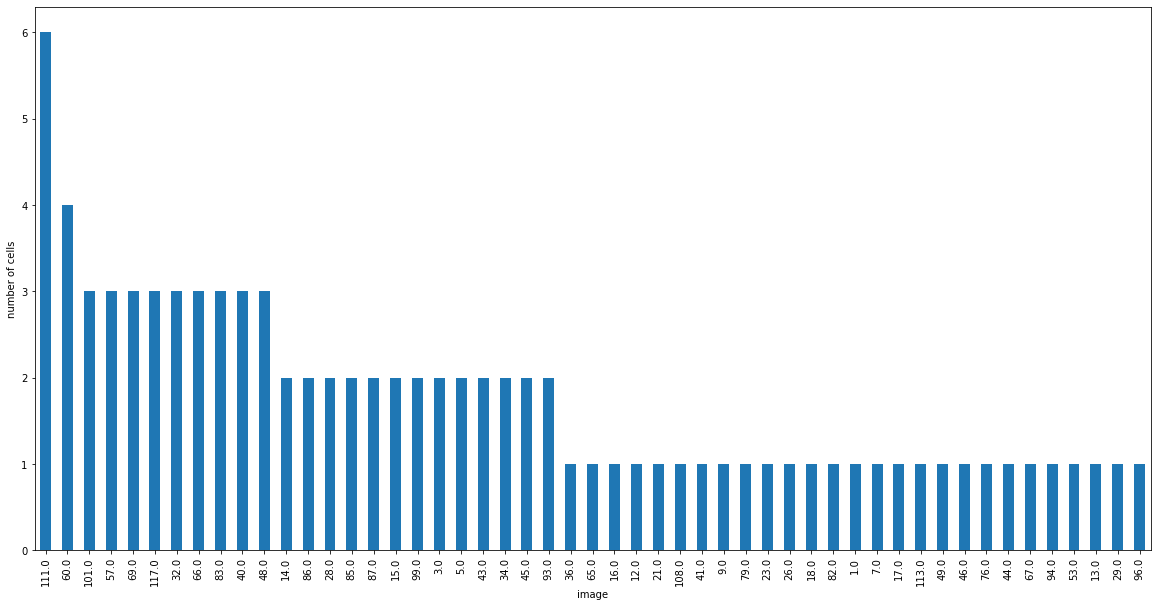

In [25]:
sig_cells = cell_specimens_df[cell_specimens_df['p_ns']<0.05]
pref_images = sig_cells['pref_image_ns']

fig = plt.figure(figsize=(20,10))
pref_images.value_counts().plot(kind='bar')
plt.xlabel('image')
plt.ylabel('number of cells')
plt.show()

Wait, but what is that image? In order to actually see what this stimulus is, first, we'll organize the stimulus table. This tells us which stimulus was played on each trial. This data set has 118 different scenes, and each scene is presented 50 times. Images of the scenes can be found [here](http://observatory.brain-map.org/visualcoding/stimulus/natural_scenes).

<div class="alert alert-success"><b>Task</b>:
    
1. Assign your top image to <code>image_id</code>. You can do this programmatically, or simply hard code it.
2. The 'natural_scene_template' that we create below is a numpy array, where the first dimension is the image id, and the second and third are the values of the image. You want to plot <code>natural_scene_template[image_id,:,:]</code> Use the <code>imshow()</code> method to show the image, just as we did with our maximum projection above.

</div>

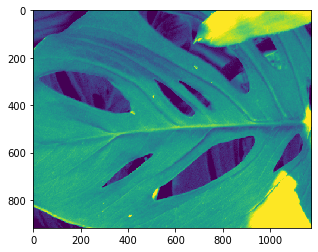

In [27]:
natural_scene_table = data.get_stimulus_table('natural_scenes')
natural_scene_template = data.get_stimulus_template('natural_scenes')
sceneIDs = np.unique(natural_scene_table.frame)


# Choose your image id
image_id = 111

plt.imshow(natural_scene_template[image_id,:,:])
plt.show()

# Plot this natural scene

## Step 7. Examine the direction selectivity of your cell
Sometimes, the function of a cell is not particularly clear from natural stimuli. Those stimuli have a lot of information in them, and it might be hard to tell what a cell is actually responding to. Instead, we can use simple drifting gratings to look at one straightforward property of a cell: <b>does it respond to specific directions of movement?</b></br>

We can use the columns that look at the direction selectivity index (DSI) in order to determine whether our cells are direction selective (typically considered having a DSI > 0.5). Take another look at the cell_specimens_df we created above. How would you analyze the data here to see if your cells were direction selective? How would you go back and compare these data to that of other cell types?